In [1]:
import os, glob
import pandas as pd
import numpy as np
import math, random
from datetime import datetime
import pickle
from matplotlib import pyplot as plt
import argparse
import path, sys, re, time
from collections import Counter
from scipy.spatial import distance_matrix
from scipy.signal import find_peaks

from module_.readText import read_adlmr
from module_.info.adlmr import adlmr_location
from module_.featureExtraction import feature_extraction
from module_.changePointDetection import change_point_detection
from module_.info.config import feature_name
from module_.dataLoader import dataLoader

In [2]:
episodes, transitions, labels = dataLoader("adlmr")

sensors = set()
for episode in episodes:
    sensors = sensors | set(episode[:,0])
sensors = sorted(sensors)

In [ ]:
# CALCULATE

sensors = set()
for episode in episodes:
    sensors = sensors | set(episode[:,0])
sensors = sorted(sensors)

scores = []
features = []

for index in range(len(episodes)):
    episode, transition, label = episodes[index], transitions[index], labels[index]

    feature = np.array(
        feature_extraction(episode, "adlmr", sensors)
    )

    score = np.array(
        change_point_detection(feature, "RuLSIF")
    )

    scores.append(score)
    features.append(feature)

np.save("./replication/adlmr/scores_lft.npy", scores)
np.save("./replication/adlmr/features_lft.npy", features)

In [ ]:
# EVALUATE

sensors = set()
for episode in episodes:
    sensors = sensors | set(episode[:,0])
sensors = sorted(sensors)

# index = 17
scores = np.load("./replication/adlmr/scores_original.npy", allow_pickle=True)
features = np.load("./replication/adlmr/features_original.npy", allow_pickle=True)

threshold = 0.1

tp = tn = fp = fn = 0

for index in range(len(episodes)):
    episode, transition, label = episodes[index], transitions[index], labels[index]

    feature, score =  features[index], scores[index]

    tl, tr = float(episode[transition-1,2]), float(episode[transition,2])

    etp = etn = efp = efn = 0

    for i in range(len(episode)):
        s, v, t = episode[i][:3]
        t = float(t)

        if score[i]>threshold:
            if abs(t-tl)<2 or abs(t-tr)<2:
                etp+=1
            else:
                efp+=1
        else:
            if i==transition or i==transition-1:
                efn+=1
            else:
                etn+=1

    if etp!=0:
        efn = 0
        etp = 1
    tp+=etp; tn+=etn; fp+=efp; fn+=efn

# print(tp/(tp+fn), fp/(fp+tn))
print(fp/len(episodes), tp/len(episodes))
print(tp, tn, fp, fn)

In [ ]:
# PLOT
# SAMPLE

sensors = set()
for episode in episodes:
    sensors = sensors | set(episode[:,0])
sensors = sorted(sensors)

index = 0
episode, transition, label = episodes[index], transitions[index], labels[index]

feature = np.array(
    feature_extraction(episode, "adlmr", sensors)
)

score = np.array(
    change_point_detection(feature, "RuLSIF")
)

score[score<0]=0

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()

ax.set_title(label)
ax.set_xlabel("Event"); ax.set_ylabel("Score")
# plt.ylim(-0.1, 1)
ax.bar(range(len(score)), score)
for i in range(len(transition)):
    point = transition[i]
    lb, ub = point-1, point
    tl, tr = float(episode[lb,2]), float(episode[ub,2])
    while tl-float(episode[lb,2])<5. and lb!=0:
        lb-=1
    while float(episode[ub,2])-tr<5. and lb!=len(episode)-1:
        ub+=1
    plt.axvline(
        point, linestyle="dotted", color="g"
    )
    plt.axvspan(
        lb, ub, alpha=0.2, color='g'
    )

In [10]:
# PREPROCESSING

idx = 0
episode, transition, label = episodes[idx], transitions[idx], labels[idx]

start_time = int(float(episode[0,2]))
end_time = int(float(episode[-1, 2]))
vectors = []

transition_time_l = int(float(episode[transition-1][2]))
transition_time_r = int(float(episode[transition][2]))

sensor_state = {sensor:False for sensor in sensors}
updated_time = {sensor:start_time for sensor in sensors}

current_time = start_time
eindex = 0
l = []
while current_time!=end_time:

    state_vector = np.zeros(len(sensors))

    while int(float(episode[eindex, 2]))<=current_time:
        s, v, t = episode[eindex][:3]
        t = int(float(t))

        if s[0]=="M":
            if v=="true" or v=="ON":
                sensor_state[s]=True
                updated_time[s]=t
            else:
                sensor_state[s]=False

        eindex+=1

    for sensor in sensors:
        si = sensors.index(sensor)
        
        state_vector[si]=1 if sensor_state[sensor] else 0

    # l.append((int(current_time), state_vector))
    l.append(state_vector)

    current_time+=1

    for sensor in sensors:
        if sensor_state[sensor] and t-updated_time[sensor]>10.: # Time exceed
            sensor_state[sensor]=False

    


# for ei in range(len(episode)):
#     s, v, t = episode[ei]
#     t = float(t)-start_time
#     state_vector = np.zeros(len(sensors))

#     if s[0]=="M":
#         if v=="true":
#             sensor_state[s]=True
#             updated_time[s]=t
#         else:
#             sensor_state[s]=False
#         if sensor_state[s] and t-updated_time[s]>60.: # Time exceed
#             sensor_state[s]=False
    
#     for sensor in sensors:
#         si = sensors.index(sensor)
        
#         state_vector[si]=1 if sensor_state[sensor] else 0

#     vectors.append(state_vector)


([<matplotlib.axis.YTick at 0x7fe11db197f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

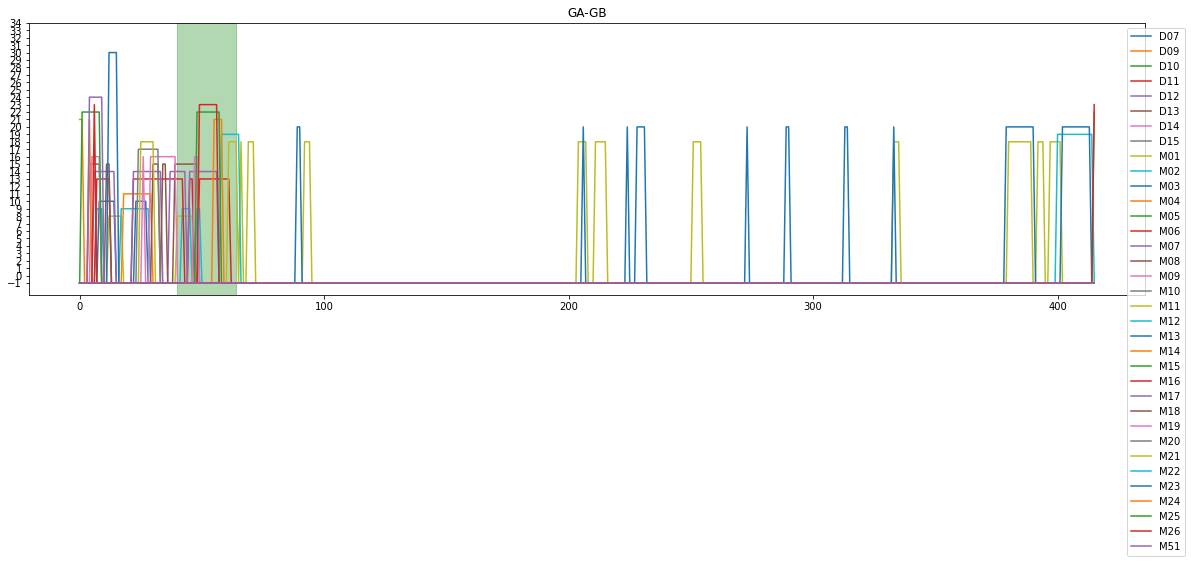

In [11]:
# PLOT

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()

l_ = np.array(l)
for i in range(l_.shape[1]):
    sensor_state = l_[:,i]
    plt.plot(range(len(sensor_state)), [i if sensor_state[k]==1. else -1 for k in range(len(sensor_state))], label=sensors[i])
plt.title(label)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper right")
plt.axvspan(transition_time_l-start_time-10, transition_time_r-start_time+10, color='g', alpha=0.3)
plt.yticks(range(-1, len(sensors)))